## K-Means Implementation

I'll verify the K vs Inertia tradeoff.

I'll also verify how scaling is mandatory.

I'll also try k-means for non-spherical clusters (eg. make_moons) and see if it really fails like its supposed to.

I'll also try both of the initialization methods.

In [35]:
## spherical clusters (blob dataset)
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, random_state=42)

In [36]:
# k-means on spherical clusters without scaling
from sklearn.cluster import KMeans

K = [1,2,3,4,5,6,7,8,9,10]
inertia = []

for k in K:

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

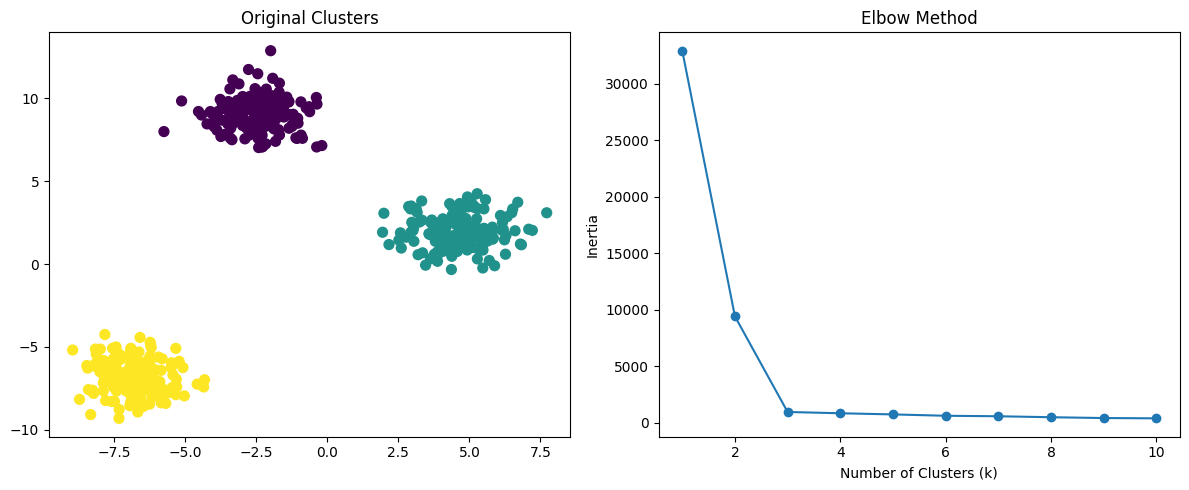

In [37]:
# plotting clusters and centroids
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50)
plt.title('Original Clusters')

plt.subplot(1,2,2)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

In [38]:
## observations:
#1. elbow at k=3
#2. inertia decreases as k increases (expected behavior)
#3. original clusters are well separated, so k-means performs well without scaling

In [39]:
# k-means on spherical clusters with scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
inertia_scaled = []

for k in K:
    kmeans_scaled = KMeans(n_clusters=k, random_state=42)
    kmeans_scaled.fit(X_scaled)
    inertia_scaled.append(kmeans_scaled.inertia_)

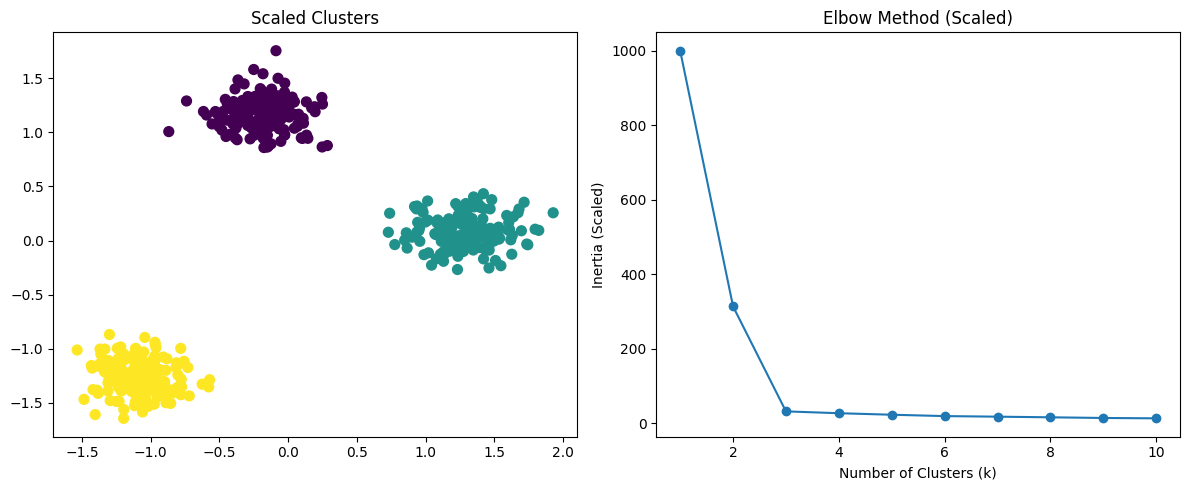

In [40]:
## plotting clusters and centroids after scaling and elbow curve

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap='viridis', s=50)
plt.title('Scaled Clusters')

plt.subplot(1,2,2)
plt.plot(K, inertia_scaled, marker='o')
plt.title('Elbow Method (Scaled)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Scaled)')

plt.tight_layout()
plt.show()

In [41]:
## observations:
#1. The elbow point is around k=3, which suggests that 3 clusters may be optimal for this dataset.
#2. The inertia values are different after scaling, but the overall trend of decreasing inertia with increasing k is still observed.
#3. Scaling did not significantly change the clustering results in this case, likely because the original clusters were already well separated.
#  However, scaling can be crucial for datasets where features have different scales or when clusters are not well separated.
#4. optimal k is still 3.

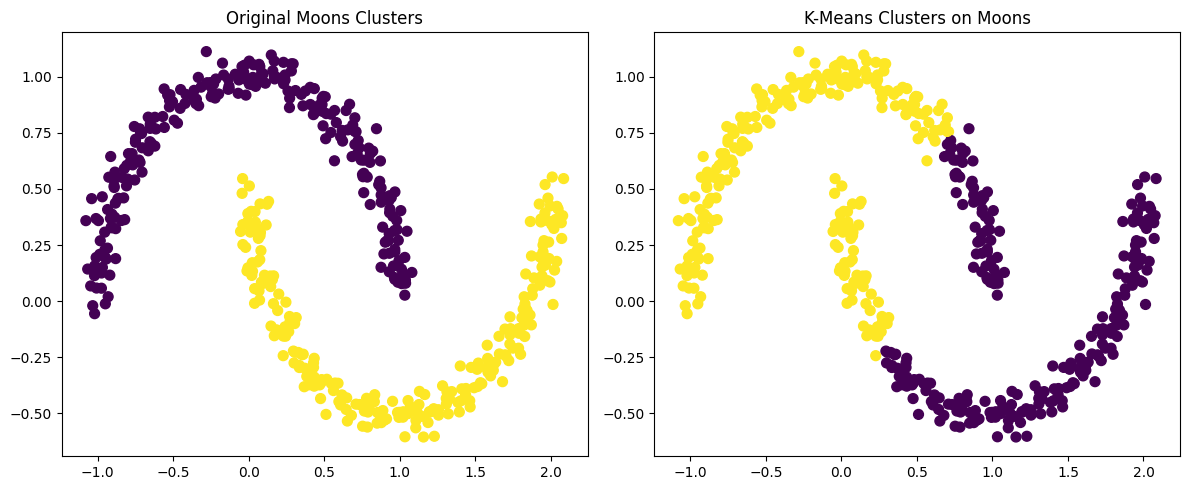

In [42]:
## k-means on non-spherical clusters (moons dataset)

from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=500, noise=0.05, random_state=42)

kmeans_moons = KMeans(n_clusters=2, random_state=42)
kmeans_moons.fit(X_moons)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons, cmap='viridis', s=50)
plt.title('Original Moons Clusters')

plt.subplot(1,2,2)
plt.scatter(X_moons[:,0], X_moons[:,1], c=kmeans_moons.labels_, cmap='viridis', s=50)
plt.title('K-Means Clusters on Moons')

plt.tight_layout()
plt.show()

In [43]:
## observations:
#1. moon dataset has non-spherical clusters, so k-means struggles to capture the true cluster structure.
#2. k-means assigns points to clusters based on distance to centroids, which leads to incorrect cluster assignments in this case.

In [44]:
## k-means for different initializations

k_means_init_random = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
k_means_init_random.fit(X)
print("Random Initialization Inertia:", k_means_init_random.inertia_)

k_means_init_kmeanspp = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
k_means_init_kmeanspp.fit(X)
print("K-Means++ Initialization Inertia:", k_means_init_kmeanspp.inertia_)


Random Initialization Inertia: 955.6493433489619
K-Means++ Initialization Inertia: 955.6493433489619


In [45]:
## observations:
#1. random and kmeans++ have the same intertia, causs the dataset is simple and well seperated
#2. generally kmeans++ has lower intertia due to better centroid handling